### The Odds Ratio

#### A Gamma Ray Burst

An odds ratio $O_{ij}$ is calculated for two models $M_i$ and $M_j$ with the following equation

\begin{align}
    O_{ij} = \frac{P(M_i)}{P(M_j)} \cdot \frac{P(d|M_i)}{P(d|M_j)}
\end{align}

where $d$ is the observed data that the models are trying to describe. In this problem there are three models ($M_0$, $M_1$, and $M_2$) with

\begin{align}
    P(M_0) = P(M_1) = P(M_2) = \frac{1}{3}
\end{align}

so the odds ratios become

\begin{align}
    O_{10} &= \frac{P(d|M_1)}{P(d|M_0)} \\
    O_{20} &= \frac{P(d|M_2)}{P(d|M_0)} \\
    O_{21} &= \frac{P(d|M_2)}{P(d|M_1)}
\end{align}

For Model 0, it is assumed the luminosity is a constant consistent with the background luminosity of the galaxy, $B$:
\begin{align}
    P(d|M_0) = \prod_i \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left( d_i - B \right)^2}
\end{align}

For Model 1, it is assumed the luminosity is a constant consistent with the background luminosity of the galaxy, $B$, plus an additional constant source of luminosity, $L$:
\begin{align}
    P(d|M_1) &= \int P(d|L,M_1) P(L|M_1) dL\\
    P(d|L,M_1) &= \prod_i \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left( d_i - (B+L) \right)^2} \\
    P(L|M_1) &= \frac{1}{10}\theta(L) \theta(10-L)
\end{align}

For Model 2, it is assumed the luminosty is a constant consistent with the background luminosity of the galaxy, $B$, plus an exponentially decaying luminosity source, with amplitude $A$ and decay constant $\tau$:
\begin{align}
    P(d|M_2) &= \int \int P(d|A,\tau,M_2) P(A|M_2) P(\tau |M_2) dA d\tau\\
    P(d|A,\tau,M_2) &= \prod_i \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left( d_i - (B+Ae^{-i/\tau}) \right)^2}\\
    P(A|M_2) &= \frac{1}{10}\theta(A) \theta(10-A)\\
    P(\tau|M_2) &= \frac{1}{10}\theta(1-\tau) \theta(100-\tau)
\end{align}
where $B$ is the background galactic luminosity and is equal to 5 in arbitrary units. $L$ is the constant additional luminosity proposed in $M_1$ whereas $A$ and $\tau$ are the parameters for the exponentially decaying signal proposed in $M_2$.

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [41]:
def light_source(t, B, A, tau, spread):
    return np.random.normal(B + A * np.exp(-t/tau), spread)

In [42]:
# Data is taken over 100 hours
# We will analyse the data after 10, 24, and 100 hours
time = np.linspace(0, 100, 100)
time_10 = time[0:10]
time_24 = time[0:24]
time_100 = time

In [67]:
# Set random seed to get reproducable datasets
np.random.seed(12345)
# Create dataset and create subsets based on data recording length
data = light_source(time, 5, 1.5, 35, 1.0)
dataset_10 = data[0:10]
dataset_24 = data[0:24]
dataset_100 = data

<Figure size 432x288 with 0 Axes>

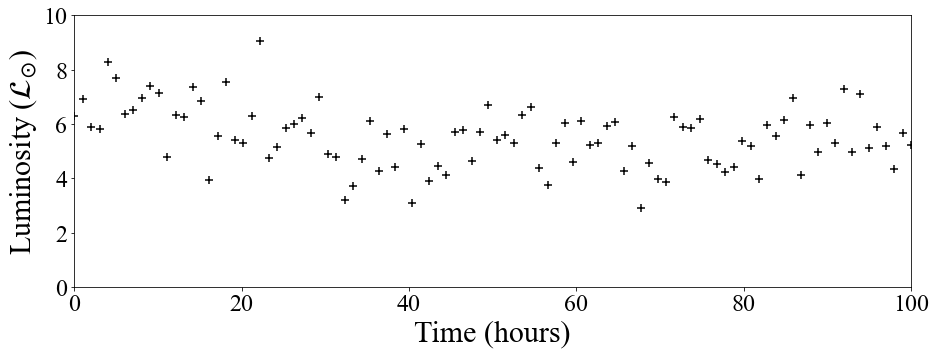

In [68]:
# Create plot of the data

plt.clf()
fig = plt.figure(figsize=(15,5))

# Plot all results
plt.scatter(time, data, marker='+', color="k", s=80, label="Data")

plt.ylabel('Luminosity ($\mathcal{L}_{\odot}$)', fontsize=30)
plt.xlabel('Time (hours)', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim([0.0, 100.0])
plt.ylim([0.0, 10.0])

plt.show()

The odds ratios described above were calculated for three data sets and are given in the table below.

In [69]:
# Calculate probability of data given the model
def probability_model_parameters(data, prediction):
    return np.prod((1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((data - prediction), 2)))

# Flat probability for value x in range x_low to x_high
def flat_probability(x, x_low, x_high):
    return 1/float(x_high - x_low) * (x_low <= x) * (x <= x_high)

In [70]:
# Model 0: Constant background luminosity = B = 5
b_value = 5

# Model 1: Constant background luminosity plus constant luminosity = B + L
l_values = np.linspace(0, 10, 1000)
l_delta = l_values[1] - l_values[0]

# Model 2: Constant background luminosity plus exponentially decaying source = B + Ae^t/tau
a_values = np.linspace(0, 10, 200)
a_delta = a_values[1] - a_values[0]

t_values = np.linspace(1, 100, 200)
t_delta = t_values[1] - t_values[0]

In [71]:
# Record odds ratios to print later
odds_ratios = []

# Loop over datasets with time information
for dataset, times in zip([dataset_10, dataset_24, dataset_100], [time_10, time_24, time_100]):
    
    # Record odds ratios for a dataset
    odds_ratios_dataset = []
    
    # Model 0 probability
    prediction_model_0 = b_value
    probability_model_0 = probability_model_parameters(dataset, prediction_model_0)

    # Model 1 probability
    probability_model_1 = 0
    # Loop over possible L values
    for l_value in l_values:
        probability_model_1 += probability_model_parameters(dataset, b_value + l_value) * flat_probability(l_value, np.min(l_values), np.max(l_values)) * l_delta

    # Model 2 probability
    probability_model_2 = 0
    # Loop over possivle A and tau values
    for t_value in t_values:
        for a_value in a_values:
            probability_model_2 += probability_model_parameters(dataset, b_value + (a_value*np.exp(-times/float(t_value)))) * flat_probability(a_value, np.min(a_values), np.max(a_values)) * a_delta * flat_probability(t_value, np.min(t_values), np.max(t_values)) * t_delta
    
    odds_ratios_dataset.append(probability_model_1 / probability_model_0)
    odds_ratios_dataset.append(probability_model_2 / probability_model_0)
    odds_ratios_dataset.append(probability_model_2 / probability_model_1)
    
    odds_ratios.append(odds_ratios_dataset)

In [77]:
print("|     Odds Ratios     |   10H Data   |  24H Data  |  100H Data |")
print("|---------------------|--------------|------------|------------|")
print("|       $O_{10}$" + "      |  {:5.5}  | {:5.5}  | {:5.5} |".format(odds_ratios[0][0], odds_ratios[1][0], odds_ratios[2][0]))
print("|       $O_{20}$" + "      |  {:5.5}  | {:5.5} | {:5.5} |".format(odds_ratios[0][1], odds_ratios[1][1], odds_ratios[2][1]))
print("|       $O_{21}$" + "      |  {:5.5}     | {:5.5}     | {:5.5} |".format(odds_ratios[0][2], odds_ratios[1][2], odds_ratios[2][2]))

|     Odds Ratios     |   10H Data   |  24H Data  |  100H Data |
|---------------------|--------------|------------|------------|
|       $O_{10}$      |  1.1632e+06  | 4.475e+09  | 3.4106e+04 |
|       $O_{20}$      |  7.8706e+05  | 7.1121e+09 | 1.2371e+09 |
|       $O_{21}$      |  0.67661     | 1.5893     | 3.6271e+04 |


#### 10H Dataset

For the 10 hour data set, $M_1$ and $M_2$ are more likely than $M_0$ since $O_{10} > 1$ and $O_{20} > 1$. Similarly, $M_1$ is more likely than $M_2$ since $O_{21} > 1$. This would imply the existence of a constant source of optical light in addition to the background light from the galaxy. At least, this explanation is more likely than the absence of an additional source or an exponentially decaying source. Since the odds ratios $O_{10}$ and $O_{20}$ are $>>1$, it is therefore implied that the absence of an optical source is less likely than some kind of optical source, constant or exponentially decaying.

The most likely value for the constant luminosity source can be found by calculating the posterior for the constant Model 1 parameter $L$. The posterior PDF for the parameter $L$ in this model is given by
\begin{align}
    P(L|d,1) = \frac{P(d|L,M_1)P(L|M_1)}{P(d|M_1)}
\end{align}
and is shown below.

In [78]:
probability_model_1 = 0

for l_value in l_values:
    probability_model_1 += probability_model_parameters(dataset_10, b_value + l_value) * flat_probability(l_value, np.min(l_values), np.max(l_values)) * l_delta

In [79]:
l_posterior = []
for l_value in l_values:
    l_posterior.append(probability_model_parameters(dataset_10, b_value + l_value) * flat_probability(l_value, np.min(l_values), np.max(l_values)) / probability_model_1)

(0.0, 1.3244875474174496)

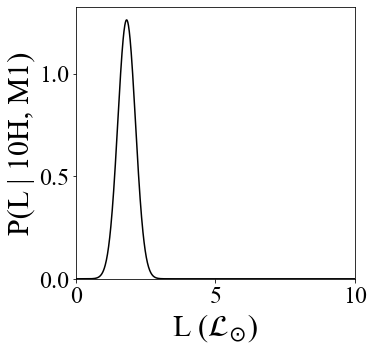

In [82]:
fig = plt.figure(figsize=(5, 5))

plt.plot(l_values, l_posterior, color="k")

plt.xlabel('L ($\mathcal{L}_{\odot}$)', fontsize=30)
plt.ylabel('P(L | 10H, M1)', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim([0.0, 10.0])
plt.ylim([0.0, plt.ylim()[1]])

In [83]:
l_most_likely = np.max(l_posterior)
print("10H Dataset")
print("Model 1 Parameters: L")
print("L Mode = {:5.5}".format(l_most_likely))

10H Dataset
Model 1 Parameters: L
L Mode = 1.2614


#### 24H Dataset

For the larger 24 hour data set, $M_2$ was more likely than $M_0$ or $M_1$. The odds ratios $O_{10}$ and $O_{20}$ continue to be $>>1$, but now the odds ratio $O_{21}$ is greater than 1. This means that $M_2$ is the most likely model out of the three considered. Since $O_{21}=1.5893 $, the probabilities for $M_1$ and $M_2$ are close to equal, suggesting that either model is a good explanation of the data. In either case, the absence of an optical source additional to the galaxy is extremely unlikely.

The 2-D posterior PDF for the parameters $A$ and $\tau$ in Model 2 is given by
\begin{align}
    P(A,\tau|d, M_2) = \frac{P(d|A,\tau, M_2)P(A| M_2)P(\tau| M_2)}{P(d| M_2)}
\end{align}
and is shown in below along with the marginalised posteriors for both $A$ and $\tau$. The most likely values of the parameters were calculated from the highest value of the 2-D posterior PDF, not from the two marginalised posterior PDFs.

In [84]:
# Calculate the evidence
probability_model_2 = 0
for t_value in t_values:
    for a_value in a_values:
        probability_model_2 += probability_model_parameters(dataset_24, b_value + (a_value*np.exp(-time_24/float(t_value)))) * flat_probability(a_value, np.min(a_values), np.max(a_values)) * a_delta * flat_probability(t_value, np.min(t_values), np.max(t_values)) * t_delta

# Scan through values of A and tau and calcualte the posterior at each 2D point
t_a_posterior = []
for t_value in t_values:
    a_posterior = []
    for a_value in a_values:
        a_posterior.append((probability_model_parameters(dataset_24, b_value + (a_value*np.exp(-time_24/float(t_value)))) * flat_probability(t_value, np.min(t_values), np.max(t_values)) * flat_probability(a_value, np.min(a_values), np.max(a_values)) / probability_model_2))
    t_a_posterior.append(a_posterior)

t_a_posterior = np.array(t_a_posterior)

([<matplotlib.axis.YTick at 0x24caf7543d0>,
 [Text(0, 0, '0'),
  Text(0, 40, '20'),
  Text(0, 80, '40'),
  Text(0, 120, '60'),
  Text(0, 160, '80'),
  Text(0, 200, '100')])

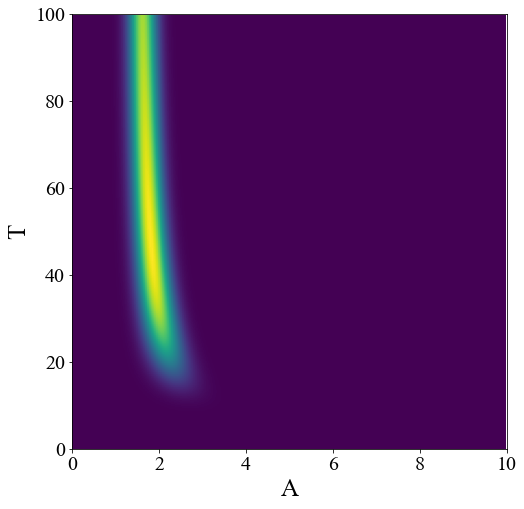

In [85]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(t_a_posterior)

plt.xlabel('A', fontsize=25)
plt.ylabel('T', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim([0.0, len(a_values)])
plt.ylim([0.0, len(t_values)])

plt.xticks(range(0, int(12*(len(a_values)/10.0)), int(2*(len(a_values)/10.0))), range(0,12,2))
plt.yticks(range(0, int(120*(len(t_values)/100.0)), int(20*(len(t_values)/100.0))), range(0, 120, 20))

<Figure size 432x288 with 0 Axes>

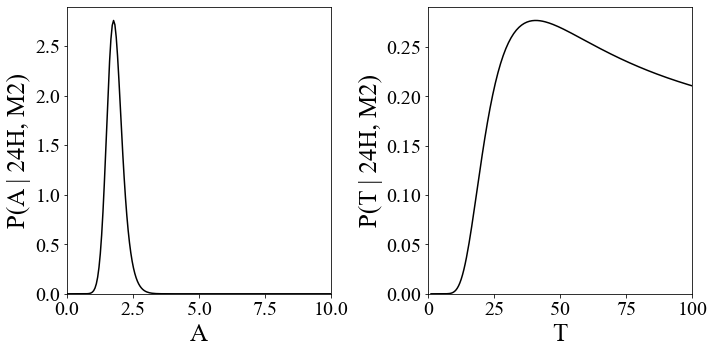

In [88]:
# Create plot of the posteriors of T and S
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(a_values, np.sum(t_a_posterior, axis=0), color="k")

ax1.set_xlabel('A', fontsize=25)
ax1.set_ylabel('P(A | 24H, M2)', fontsize=25)

ax1.tick_params(labelsize=20)

ax1.set_xlim([0.0, 10.0])
ax1.set_ylim([0.0, ax1.get_ylim()[1]])

ax2.plot(t_values, np.sum(t_a_posterior, axis=1), color="k")

ax2.set_xlabel('T', fontsize=25)
ax2.set_ylabel('P(T | 24H, M2)', fontsize=25)

ax2.tick_params(labelsize=20)

ax2.set_xlim([0.0, 100.0])
ax2.set_ylim([0.0, ax2.get_ylim()[1]])

fig.tight_layout(pad=1.0)

In [89]:
t_most_likely_24 = float(t_values[np.where(t_a_posterior == np.amax(t_a_posterior))[0]])
a_most_likely_24 = float(a_values[np.where(t_a_posterior == np.amax(t_a_posterior))[1]])
print("Most likely value of T = {}".format(t_most_likely_24))
print("Most likely value of A = {}".format(a_most_likely_24))

print("Fluctation of data = {}".format(np.std(dataset_10)))

Most likely value of T = 49.753768844221106
Most likely value of A = 1.8090452261306533
Fluctation of data = 0.7598315808991487


From the 2-D posterior PDF, the most likely parameters for the exponentially decaying source were calculated to be $A = 1.81$ and $\tau = 49.75$h. The value of $\tau$ gives some insight into why $M_1$ was more probable than $M_2$ for the 10 hour data. For the 24 hour data the timescale of the decay was measured to be 49.75 hours, which would only result in a reduction of the signal by 18\% over 10 hours.

#### 100H Dataset

The model $M_2$ was a more likely description of the 100 hour data than $M_0$ or $M_1$. With the full data set, this implies that an exponentially decaying optical source is more likely than the absence of an optical source or an optical source with constant luminosity. 

In [90]:
# Recalculate posterior using 100 hour dataset
probability_model_2 = 0
for t_value in t_values:
    for a_value in a_values:
        probability_model_2 += probability_model_parameters(dataset_100, b_value + (a_value*np.exp(-time_100/float(t_value)))) * flat_probability(a_value, np.min(a_values), np.max(a_values)) * a_delta * flat_probability(t_value, np.min(t_values), np.max(t_values)) * t_delta

t_a_posterior = []
for t_value in t_values:
    a_posterior = []
    for a_value in a_values:
        a_posterior.append((probability_model_parameters(dataset_100, b_value + (a_value*np.exp(-time_100/float(t_value)))) * flat_probability(t_value, np.min(t_values), np.max(t_values)) * flat_probability(a_value, np.min(a_values), np.max(a_values)) / probability_model_2))
    t_a_posterior.append(a_posterior)

t_a_posterior = np.array(t_a_posterior)

([<matplotlib.axis.YTick at 0x24cafcae4c0>,
 [Text(0, 0, '0'),
  Text(0, 40, '20'),
  Text(0, 80, '40'),
  Text(0, 120, '60'),
  Text(0, 160, '80'),
  Text(0, 200, '100')])

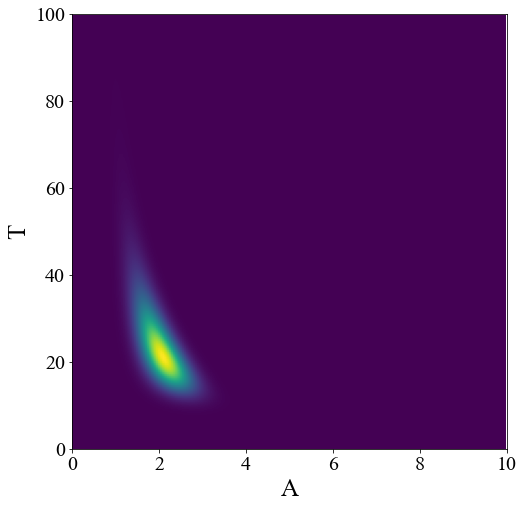

In [91]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(t_a_posterior)

plt.xlabel('A', fontsize=25)
plt.ylabel('T', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim([0.0, len(a_values)])
plt.ylim([0.0, len(t_values)])

plt.xticks(range(0, int(12*(len(a_values)/10.0)), int(2*(len(a_values)/10.0))), range(0,12,2))
plt.yticks(range(0, int(120*(len(t_values)/100.0)), int(20*(len(t_values)/100.0))), range(0, 120, 20))

<Figure size 432x288 with 0 Axes>

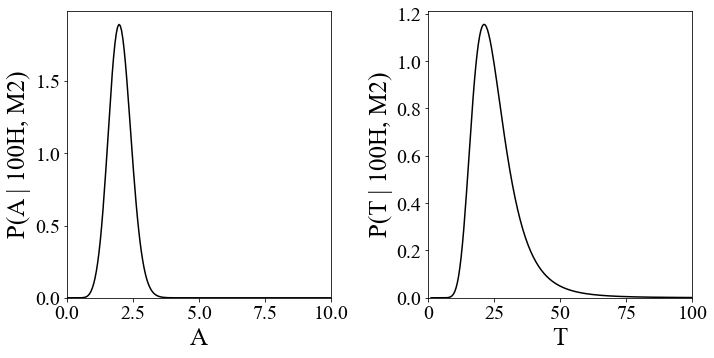

In [93]:
# Create plot of the posteriors of T and S
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(a_values, np.sum(t_a_posterior, axis=0), color="k")

ax1.set_xlabel('A', fontsize=25)
ax1.set_ylabel('P(A | 100H, M2)', fontsize=25)

ax1.tick_params(labelsize=20)

ax1.set_xlim([0.0, 10.0])
ax1.set_ylim([0.0, ax1.get_ylim()[1]])

ax2.plot(t_values, np.sum(t_a_posterior, axis=1), color="k")

ax2.set_xlabel('T', fontsize=25)
ax2.set_ylabel('P(T | H, M2)', fontsize=25)

ax2.tick_params(labelsize=20)

ax2.set_xlim([0.0, 100.0])
ax2.set_ylim([0.0, ax2.get_ylim()[1]])

fig.tight_layout(pad=1.0)

In [95]:
t_most_likely_100 = float(t_values[np.where(t_a_posterior == np.amax(t_a_posterior))[0]])
a_most_likely_100 = float(a_values[np.where(t_a_posterior == np.amax(t_a_posterior))[1]])

print("Actual value of T = {}".format(35.0))
print("Most likely value of T = {}".format(t_most_likely_100))
print("Actual value of A = {}".format(1.5))
print("Most likely value of A = {}".format(a_most_likely_100))

Actual value of T = 35.0
Most likely value of T = 21.894472361809044
Actual value of A = 1.5
Most likely value of A = 2.1105527638190957


In [94]:
def model_0(time):
    return b_value * np.ones(len(time))

def model_1(time, L):
    return (b_value + L) * np.ones(len(time))

def model_2(time, A, T):
    return (b_value + A*np.exp(-time/T)) * np.ones(len(time))

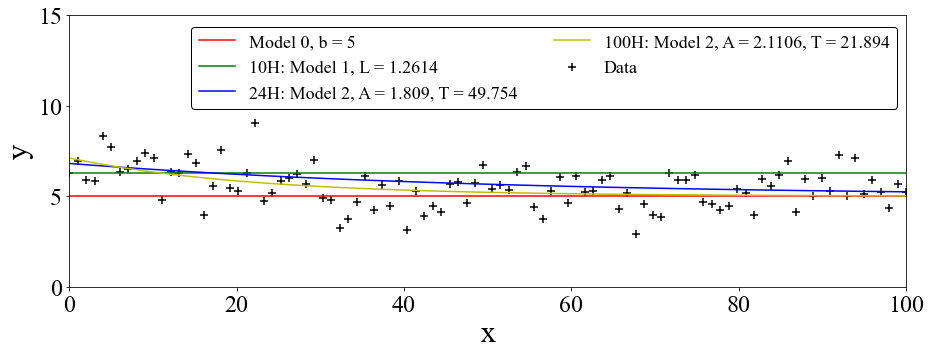

In [104]:
fig = plt.figure(figsize=(15, 5))

plt.scatter(time, dataset_100, marker='+', color="k", s=80, label="Data")

plt.plot(time, model_0(time), color="r", label="Model 0, b = {}".format(b_value))
plt.plot(time, model_1(time, l_most_likely), color="g", label="10H: Model 1, L = {:5.5}".format(l_most_likely))
plt.plot(time, model_2(time, a_most_likely_24, t_most_likely_24), color="b", label="24H: Model 2, A = {:5.5}, T = {:5.5}".format(a_most_likely_24, t_most_likely_24))
plt.plot(time, model_2(time, a_most_likely_100, t_most_likely_100), color="y", label="100H: Model 2, A = {:5.5}, T = {:5.5}".format(a_most_likely_100, t_most_likely_100))

plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim([0.0, 100.0])
plt.ylim([0.0, 15.0])

plt.legend(loc='upper right', edgecolor='black', bbox_to_anchor=(1.0, 0.99), ncol=2, fancybox=True, shadow=False, fontsize=18, framealpha=1.0)

For all three data sets, the null hypothesis $M_0$ was less likely than the either of the signal hypotheses $M_1$ and $M_2$. This would suggest that there is an optical source, either constant or exponentially decaying. The initial data would suggest a constant optical source, but with the collection of more data, an exponentially decaying model described the data more accurately. As more data was available, the parameters of the exponential decay were adjusted to produce a fit that fit the whole data set better. It was therefore likely that an optical source existed, and that exponentially decayed with a characteristic time scale of 24.4 hours. With the addition of more data, the parameters on the exponentially decaying model may be restricted further than the posteriors given, due to the data spanning many decay times.